In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('data.csv')

In [0]:
X = data.drop('y', axis=1)
y = data['y']

In [0]:
X.head()

x1      x2      x3      x4  ...      x7      x8      x9     x10
0 -0.6477 -0.9959 -0.4183  0.6936  ...  0.3323 -1.1475  0.5000 -1.5846
1 -0.6069  0.4251 -1.1568  0.3323  ...  0.7233  0.0461 -0.0880  0.3510
2  1.6924  0.1599  2.2234 -1.2089  ...  1.6357 -1.3610  0.0544  0.3943
3  2.0879  0.0480 -1.1056 -2.3581  ... -0.2762  0.7965  0.5425  0.8378
4 -0.3030 -1.3475 -0.1307 -0.0094  ... -0.1967  0.8365  0.5099  0.8021

[5 rows x 10 columns]

In [0]:
data.head()

x1      x2      x3      x4  ...      x8      x9     x10       y
0 -0.6477 -0.9959 -0.4183  0.6936  ... -1.1475  0.5000 -1.5846 -0.8849
1 -0.6069  0.4251 -1.1568  0.3323  ...  0.0461 -0.0880  0.3510  2.7268
2  1.6924  0.1599  2.2234 -1.2089  ... -1.3610  0.0544  0.3943 -1.1084
3  2.0879  0.0480 -1.1056 -2.3581  ...  0.7965  0.5425  0.8378 -1.3125
4 -0.3030 -1.3475 -0.1307 -0.0094  ...  0.8365  0.5099  0.8021 -4.8474

[5 rows x 11 columns]

In [0]:
import matplotlib.pyplot as plt

x1


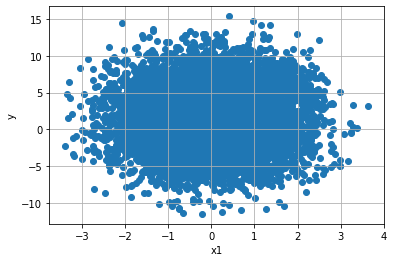

x2


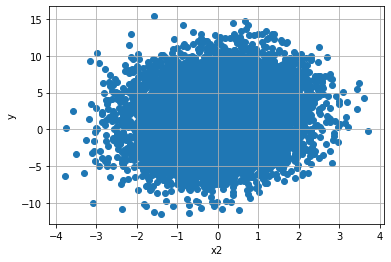

x3


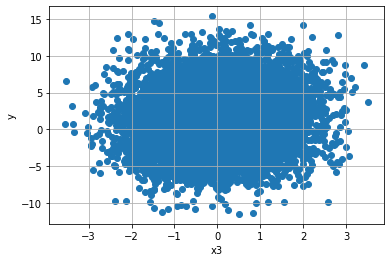

x4


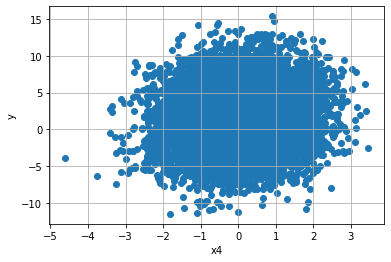

x5


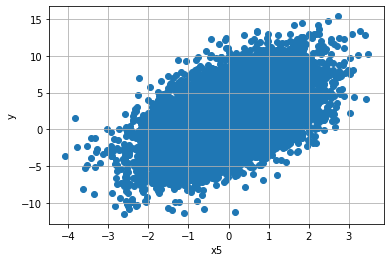

x6


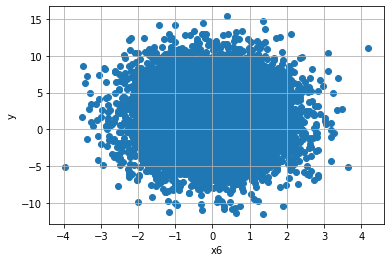

x7


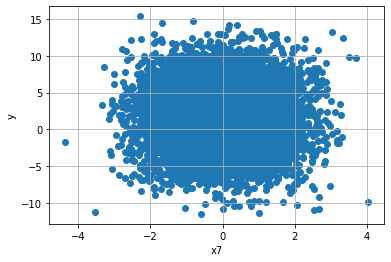

x8


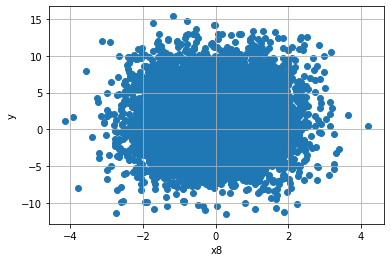

x9


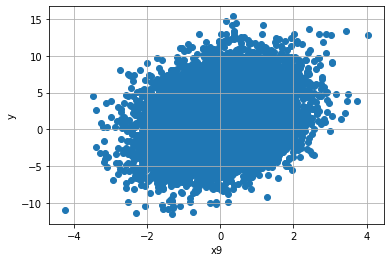

x10


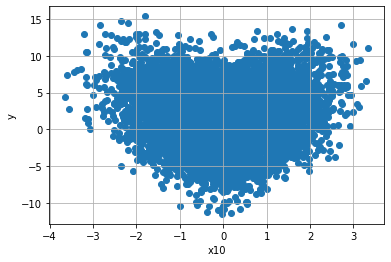

In [0]:
for i in range(1, 11):
    col_name = 'x' + str(i)
    print(col_name)
    plt.scatter(data[col_name], data['y'])
    plt.xlabel(col_name)
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

In [0]:
data.corr()['y']

x1     0.011133
x2     0.097671
x3     0.070476
x4     0.084924
x5     0.510526
x6    -0.009039
x7    -0.011433
x8     0.014182
x9     0.260893
x10   -0.002117
y      1.000000
Name: y, dtype: float64

In [0]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LinearRegression

my_model = LinearRegression().fit(X, y)


perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 9.8MB/s 


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

def base_model():
    model = Sequential()
    model.add(Dense(200, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer = 'adam')
    return model

clf = KerasRegressor(build_fn=base_model, epochs=30, batch_size=128,verbose=0)
clf.fit(X,y)

perm = PermutationImportance(clf, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())